In [ ]:
"""
Project: Student Performance Analysis
Dataset: StudentsPerformance.csv (Kaggle)
Objective: To analyze how demographic and socio-economic factors (like gender, parental education,
            lunch type, and test preparation) affect students' scores in math, reading, and writing.
"""


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
student_performance_df = pd.read_csv("StudentsPerformance.csv")

In [24]:
student_performance_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [25]:
student_performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [26]:
student_performance_df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [27]:
student_performance_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [28]:
for col in student_performance_df.columns:
    print(f"Unique: ", student_performance_df[col].unique())

Unique:  ['female' 'male']
Unique:  ['group B' 'group C' 'group A' 'group D' 'group E']
Unique:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique:  ['standard' 'free/reduced']
Unique:  ['none' 'completed']
Unique:  [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Unique:  [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
Unique:  [ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  6

In [29]:
student_performance_df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [30]:
student_performance_df.duplicated().sum()

np.int64(0)

## Overall Distribution of Scores

<Axes: xlabel='math score', ylabel='Count'>

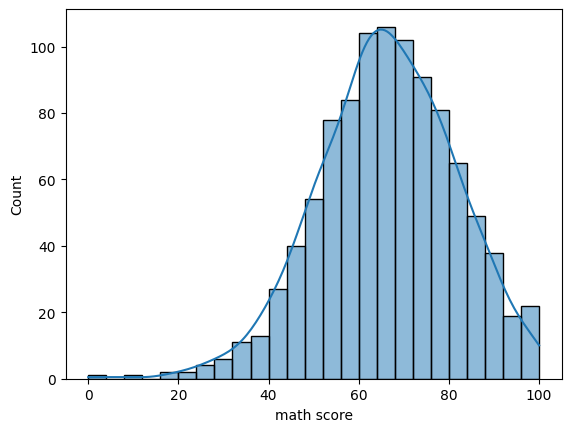

In [31]:
sns.histplot(student_performance_df['math score'], kde=True)

<Axes: xlabel='reading score', ylabel='Count'>

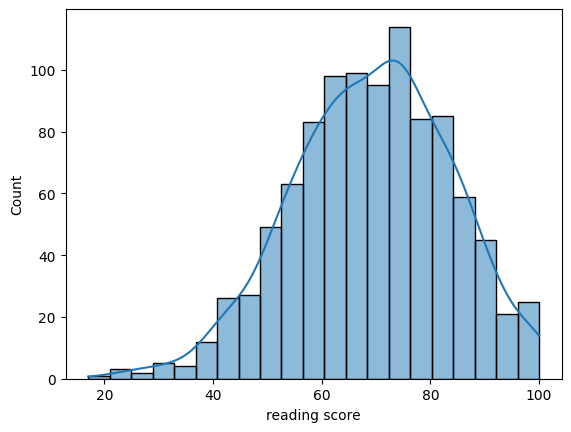

In [32]:
sns.histplot(student_performance_df['reading score'], kde= True)

<Axes: xlabel='writing score', ylabel='Count'>

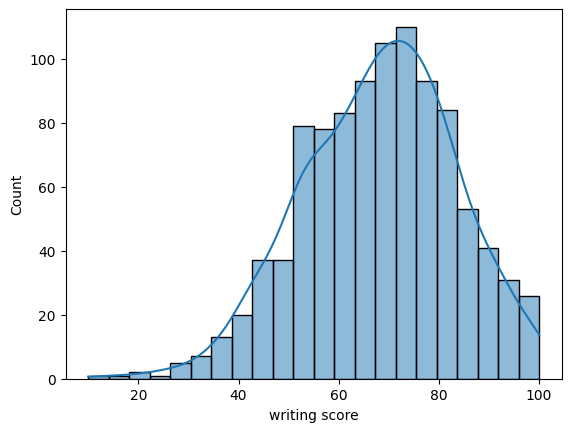

In [33]:
sns.histplot(student_performance_df['writing score'], kde = True)

## Average Scores by Gender

In [34]:
gender_avg = student_performance_df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

In [20]:
gender_avg

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


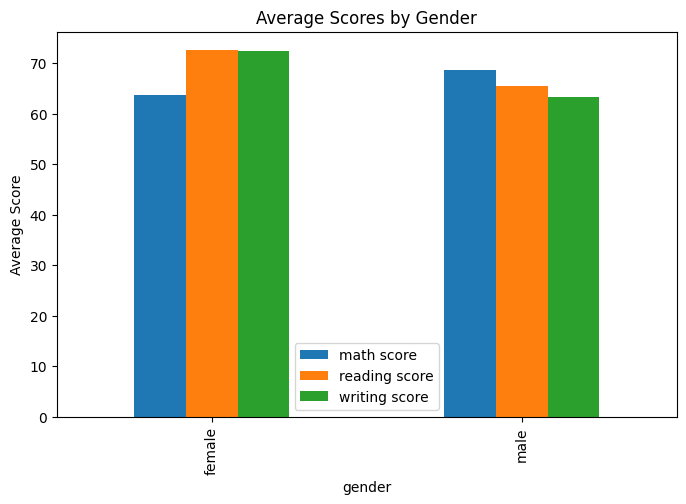

In [43]:
gender_avg = student_performance_df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
gender_avg.plot(kind='bar', figsize=(8,5))
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.show()

## Impact of Test Preparation Course

Text(0.5, 1.0, 'Math Score vs Course Preparation')

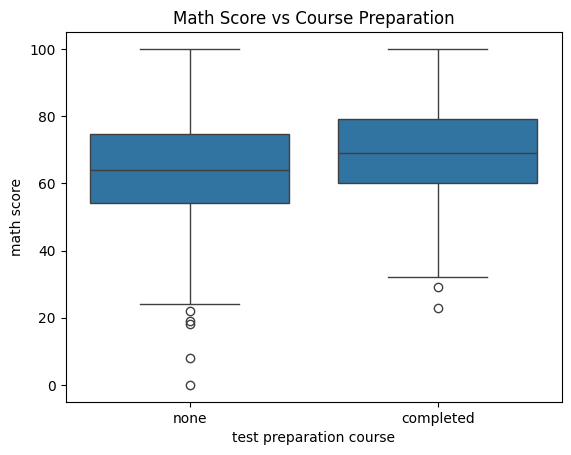

In [44]:
sns.boxplot(x="test preparation course", y="math score", data=student_performance_df)
plt.title(
    'Math Score vs Course Preparation'
)

## Effect of Parental Education

Text(0.5, 1.0, 'Average Math Score by Parental Education Level')

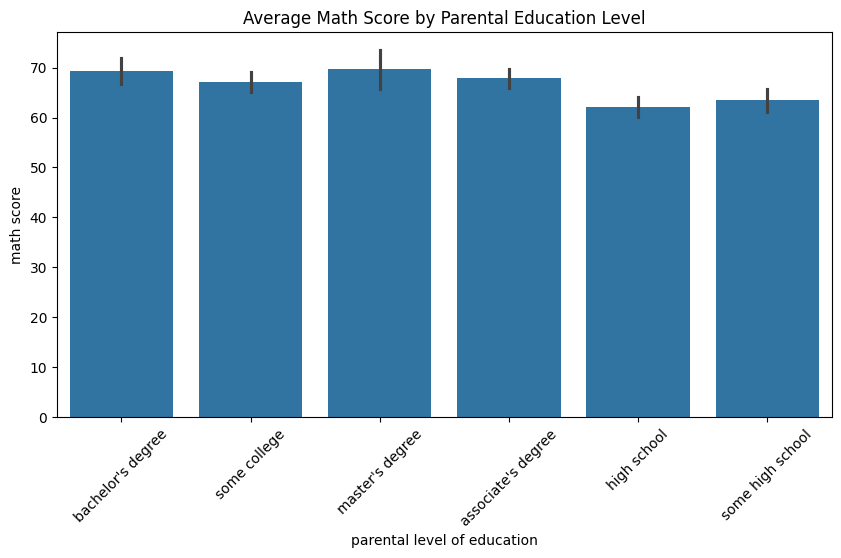

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(x='parental level of education', y='math score', data=student_performance_df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average Math Score by Parental Education Level")


## Lunch Type vs Performance

Text(0.5, 1.0, 'Math Score Distributed by Lunch Type')

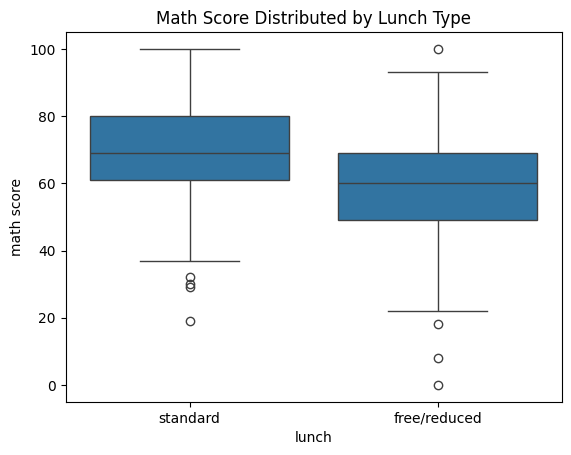

In [46]:
sns.boxplot(x="lunch", y = "math score", data=student_performance_df)
plt.title("Math Score Distributed by Lunch Type")

## Correlation Heatmap

Text(0.5, 1.0, 'Correlation Between Subjects')

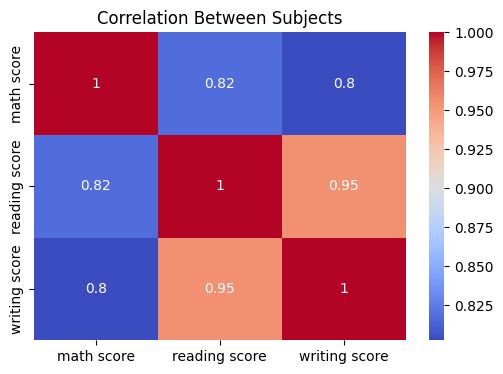

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(student_performance_df[['math score','reading score','writing score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Subjects")


## Average Score

Text(0.5, 1.0, 'Distribution of Average Scores')

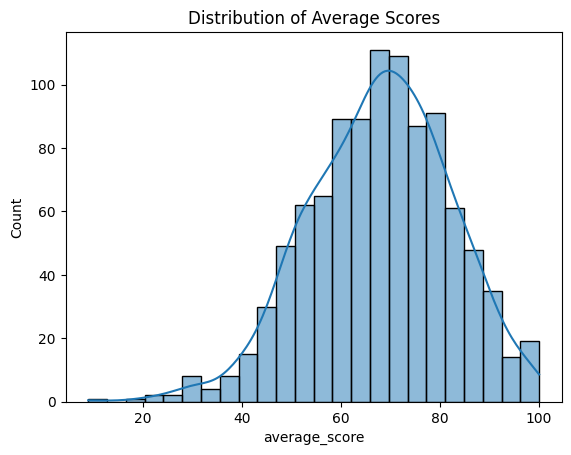

In [48]:
student_performance_df['average_score'] = student_performance_df[['math score','reading score','writing score']].mean(axis=1)
sns.histplot(student_performance_df['average_score'], kde=True)
plt.title("Distribution of Average Scores")


# Key Insights / Findings

Female students performed slightly better in reading and writing.

Test preparation course improved scores by ~10%.

Higher parental education correlates with better performance.

Math, reading, and writing are strongly correlated.